<a href="https://colab.research.google.com/github/ParnaChat/Amazon-Customer-Review/blob/main/Amazon_customer_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**
Study the review pattern of the products sold in amazon.
Classifying all the classes of sentiments based on reviews and ratings.
Find the critics of a product from the buyers, so that amazon can consider these as feedback and give them to the seller to help them improve their products.

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Importing the dataset**

In [ ]:
reviews = pd.read_csv('/content/1429_1.csv')

In [ ]:
print (reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
reviews1 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [ ]:
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(reviews1.shape))
print (reviews1.info())

The shape of the  data is (row, column):(5000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   

In [ ]:
reviews2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [ ]:
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(reviews2.shape))
print (reviews2.info())

The shape of the  data is (row, column):(28332, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null   

In [ ]:
# Concatenate the datasets based on the common heading
result = pd.concat([reviews,reviews1, reviews2], ignore_index=True)
print(result)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
67987  AVqkIhxunnc1JgDc3kg_   
67988  AVqkIhxunnc1JgDc3kg_   
67989  AVqkIhxunnc1JgDc3kg_   
67990  AVqkIhxunnc1JgDc3kg_   
67991  AVqkIhxunnc1JgDc3kg_   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
67987  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  B018T075D

In [ ]:
# The result is saved to a new CSV file
result.to_csv('raw_reviews.csv', index=False)

In [ ]:
# To find the dimension of the data
result.shape

(67992, 27)

In [ ]:
## print information
print (result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67959 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
#Creating a copy
raw_reviews=result.copy()
# Visualising a sample of data
raw_reviews.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ...  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  dateAdded dateUpdated  \
0                   NaN           Adapter        NaN         NaN   
1                   NaN            truman        NaN         NaN   
2                   NaN             DaveZ        NaN         NaN   
3                   NaN            Shacks        NaN         NaN   
4                   NaN         explore42        NaN         NaN   

  primaryCategories imageURLs  manufacturerNumber  sourceURLs  
0               NaN       NaN                 NaN         NaN  
1               NaN       NaN                 NaN         NaN  
2               NaN       NaN                 NaN         NaN  
3               NaN       NaN                 NaN         NaN  
4               NaN       NaN                 NaN         NaN  

[5 rows x 27 columns]

# **Preprocessing and cleaning**

In [ ]:
# Checking duplicate values if present in the data
duplicate_rows = raw_reviews[raw_reviews.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (95, 27)


In [ ]:
# Drop duplicate rows based on all columns
process_reviews = raw_reviews.drop_duplicates()

In [ ]:
# To check whether the duplicate values are removed in the data
d_rows = process_reviews[process_reviews.duplicated()]
print("Number of duplicate rows :: ", d_rows.shape)

Number of duplicate rows ::  (0, 27)


In [ ]:
#Checking for null values
round(((process_reviews.isna().sum())*100/67992),2)

id                       0.00
name                     9.94
asins                    0.00
brand                    0.00
categories               0.00
keys                     0.00
manufacturer             0.00
reviews.date             0.06
reviews.dateAdded       62.97
reviews.dateSeen         0.00
reviews.didPurchase     99.85
reviews.doRecommend     18.88
reviews.id              99.76
reviews.numHelpful      18.75
reviews.rating           0.05
reviews.sourceURLs       0.00
reviews.text             0.00
reviews.title            0.03
reviews.userCity        99.86
reviews.userProvince    99.86
reviews.username         0.00
dateAdded               50.98
dateUpdated             50.98
primaryCategories       50.98
imageURLs               50.98
manufacturerNumber      50.98
sourceURLs              50.98
dtype: float64

We got null values in 17 variables, such as names, reviews date text, reviews date added, etc.
Some variables like names, user city, province etc  doesn't add any value (we got id's instead) to our objective of the project. Also, some has huge percentage amount of missing values, so we are ommittig those.

In [ ]:
# Deleting the unsignificant columns due to presence of large percentage of null values in the data
process_reviews.drop(['reviews.dateAdded'],axis=1,inplace=True)
process_reviews.drop(['reviews.didPurchase'],axis=1,inplace=True)
process_reviews.drop(['reviews.id'],axis=1,inplace=True)
process_reviews.drop(['reviews.userCity'],axis=1,inplace=True)
process_reviews.drop(['reviews.userProvince'],axis=1,inplace=True)
process_reviews.drop(['dateAdded'],axis=1,inplace=True)
process_reviews.drop(['dateUpdated'],axis=1,inplace=True)
process_reviews.drop(['imageURLs'],axis=1,inplace=True)
process_reviews.drop(['manufacturerNumber'],axis=1,inplace=True)
process_reviews.drop(['sourceURLs'],axis=1,inplace=True)
process_reviews.drop(['name'],axis=1,inplace=True)
process_reviews.drop(['primaryCategories'],axis=1,inplace=True)

In [ ]:
#Checking for null values agian after removing the columns
round(((process_reviews.isna().sum())*100/67992),2)

id                      0.00
asins                   0.00
brand                   0.00
categories              0.00
keys                    0.00
manufacturer            0.00
reviews.date            0.06
reviews.dateSeen        0.00
reviews.doRecommend    18.88
reviews.numHelpful     18.75
reviews.rating          0.05
reviews.sourceURLs      0.00
reviews.text            0.00
reviews.title           0.03
reviews.username        0.00
dtype: float64

Now for the remaining variables, the values are replaced accordingly, except reviews title.
This is because the review text and title column will be combined as the sentiments won't be contradicting in nature.

In [ ]:
# Convert the column containing dates to datetime format
process_reviews['reviews.date'] = pd.to_datetime(process_reviews['reviews.date'], errors='coerce')

In [ ]:
# Replace missing dates with a median value
median_date = process_reviews['reviews.date'].median()
process_reviews['reviews.date'].fillna(median_date, inplace=True)

In [ ]:
# replacing the null values with mode
process_reviews['reviews.doRecommend'].fillna(process_reviews['reviews.doRecommend'].mode()[0],inplace=True)
process_reviews['reviews.numHelpful'].fillna(0, inplace=True)

Text(0.5, 0, 'reviews.rating')

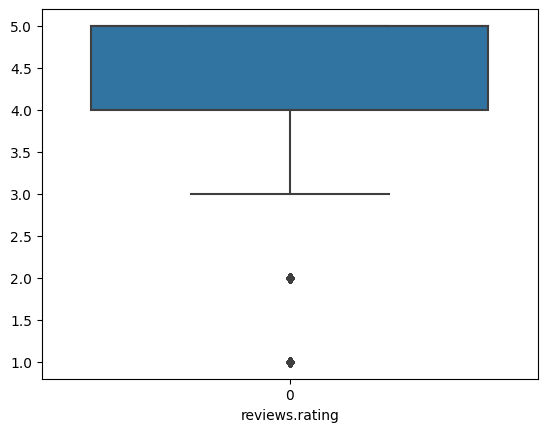

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(process_reviews['reviews.rating'])
plt.xlabel('reviews.rating')

In [ ]:
# summary statistics
process_reviews['reviews.rating'].describe()

count    67864.000000
mean         4.556142
std          0.824936
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

As the reviews ratings are skewed (observed from box-plot and summary statistics), median is used for replacing the missing values.

In [ ]:
# replacing the null values
process_reviews['reviews.rating'].fillna(process_reviews['reviews.rating'].median(),inplace=True)

In [ ]:
#Checking for null values agian after removing the columns
round(((process_reviews.isna().sum())*100/67992),2)

id                     0.00
asins                  0.00
brand                  0.00
categories             0.00
keys                   0.00
manufacturer           0.00
reviews.date           0.00
reviews.dateSeen       0.00
reviews.doRecommend    0.00
reviews.numHelpful     0.00
reviews.rating         0.00
reviews.sourceURLs     0.00
reviews.text           0.00
reviews.title          0.03
reviews.username       0.00
dtype: float64

In [ ]:
#Concatenating review text and title
process_reviews['reviews']=process_reviews['reviews.text']+process_reviews['reviews.title']
process_reviews.drop(['reviews.text', 'reviews.title'], axis=1, inplace=True)

## Creating 'sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the review rating. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment.

In [ ]:
#Figuring out the distribution of categories
process_reviews['reviews.rating'].value_counts()

5.0    47117
4.0    15377
3.0     2898
1.0     1434
2.0     1071
Name: reviews.rating, dtype: int64

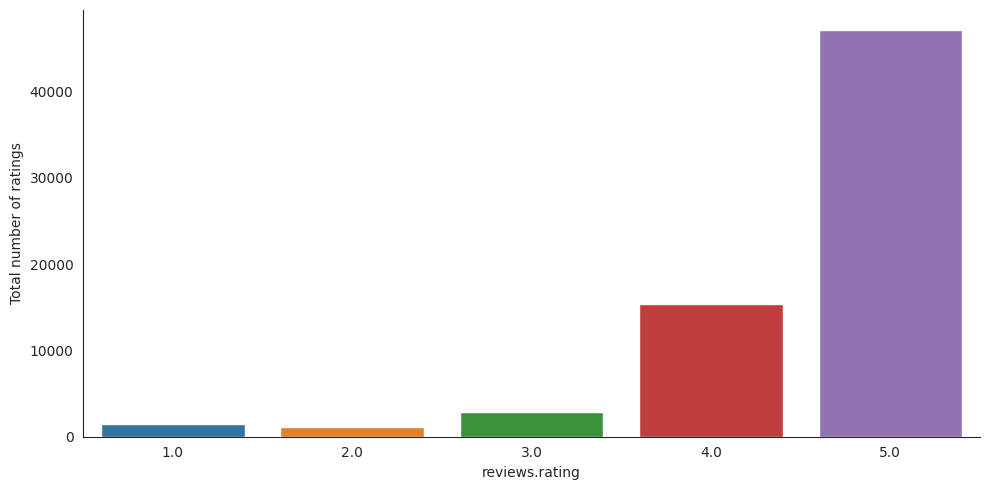

In [ ]:
# Check the distribution of the review rating
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(x="reviews.rating", data=process_reviews, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

From the plot, it can be viewed that most of the people has given the positive rating of 5 followed by 4,3,2,1.

In [ ]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] == 1.0 or row['reviews.rating'] == 2.0:
        val = 'Negative'
    elif row['reviews.rating'] == 4.0 or row['reviews.rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

id       asins   brand  \
0  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
1  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
2  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
3  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
4  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date  \
0 2017-01-13 00:00:00+00:00   
1 2017-01-13 00:00:00+00:00   
2 2017-01-13 00:00:00+00:00   
3 2017-01-13 00:00:00+00:00   
4 2017-01-12 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             5.0   
1                 0.0             5.0   
2                 0.0             5.0   
3                 0.0             4.0   
4                 0.0             5.0   

                                  reviews.sourceURLs reviews.username  \
0  http://reviews.bestbuy.com/3545/5620406/review...          Adapter   
1  http://reviews.bestbuy.com/3545/5620406/review...           truman   
2  http://reviews.bestbuy.com/3545/5620406/review...            DaveZ   
3  http://reviews.bestbuy.com/3545/5620406/review...           Shacks   
4  http://reviews.bestbuy.com/3545/5620406/review...        explore42   

                                             reviews sentiment  
0  This product so far has not disappointed. My c...  Positive  
1  great for beginner or experienced person. Boug...  Positive  
2  Inexpensive tablet for him to use and learn on...  Positive  
3  I've had my Fire HD 8 two weeks now and I love...  Positive  
4  I bought this for my grand daughter when she c...  Positive

In [ ]:
process_reviews['sentiment'].value_counts()

Positive    62494
Neutral      2898
Negative     2505
Name: sentiment, dtype: int64

## Handling time column
Here we have an unusual review time column which has date and year, once we split both we will split the date further into month and date.

In [ ]:
# Extract month and year and create new columns for them
process_reviews['day'] = process_reviews['reviews.date'].dt.day
process_reviews['month'] = process_reviews['reviews.date'].dt.month
process_reviews['year'] = process_reviews['reviews.date'].dt.year

In [ ]:
process_reviews.head()

id       asins   brand  \
0  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
1  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
2  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
3  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
4  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date  \
0 2017-01-13 00:00:00+00:00   
1 2017-01-13 00:00:00+00:00   
2 2017-01-13 00:00:00+00:00   
3 2017-01-13 00:00:00+00:00   
4 2017-01-12 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             5.0   
1                 0.0             5.0   
2                 0.0             5.0   
3                 0.0             4.0   
4                 0.0             5.0   

                                  reviews.sourceURLs reviews.username  \
0  http://reviews.bestbuy.com/3545/5620406/review...          Adapter   
1  http://reviews.bestbuy.com/3545/5620406/review...           truman   
2  http://reviews.bestbuy.com/3545/5620406/review...            DaveZ   
3  http://reviews.bestbuy.com/3545/5620406/review...           Shacks   
4  http://reviews.bestbuy.com/3545/5620406/review...        explore42   

                                             reviews sentiment  day  month  \
0  This product so far has not disappointed. My c...  Positive   13      1   
1  great for beginner or experienced person. Boug...  Positive   13      1   
2  Inexpensive tablet for him to use and learn on...  Positive   13      1   
3  I've had my Fire HD 8 two weeks now and I love...  Positive   13      1   
4  I bought this for my grand daughter when she c...  Positive   12      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [ ]:
#Removing unnecessary columns
process_reviews.drop(['keys','reviews.date','reviews.dateSeen','reviews.sourceURLs',], axis=1)
#Creating a copy
clean_reviews=process_reviews.copy()

## Review text-Punctuation Cleaning
Text processing by removing the punctuations

In [ ]:
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

id       asins   brand  \
0  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
1  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
2  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
3  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
4  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date  \
0 2017-01-13 00:00:00+00:00   
1 2017-01-13 00:00:00+00:00   
2 2017-01-13 00:00:00+00:00   
3 2017-01-13 00:00:00+00:00   
4 2017-01-12 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             5.0   
1                 0.0             5.0   
2                 0.0             5.0   
3                 0.0             4.0   
4                 0.0             5.0   

                                  reviews.sourceURLs reviews.username  \
0  http://reviews.bestbuy.com/3545/5620406/review...          Adapter   
1  http://reviews.bestbuy.com/3545/5620406/review...           truman   
2  http://reviews.bestbuy.com/3545/5620406/review...            DaveZ   
3  http://reviews.bestbuy.com/3545/5620406/review...           Shacks   
4  http://reviews.bestbuy.com/3545/5620406/review...        explore42   

                                             reviews sentiment  day  month  \
0  this product so far has not disappointed my ch...  Positive   13      1   
1  great for beginner or experienced person bough...  Positive   13      1   
2  inexpensive tablet for him to use and learn on...  Positive   13      1   
3  ive had my fire hd  two weeks now and i love i...  Positive   13      1   
4  i bought this for my grand daughter when she c...  Positive   12      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

## Review text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So the stop words which doesn't have any negative sentiment or any negative alternatives is being curated.

In [ ]:
with open("/content/stop.txt","r") as sw:
    stop_words = sw.read()

stop_words = stop_words.split("\n")

stop_words.extend(["time","android","phone","device","screen","battery","product","good","day","price"])

In [ ]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

id       asins   brand  \
0  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
1  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
2  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
3  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
4  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date  \
0 2017-01-13 00:00:00+00:00   
1 2017-01-13 00:00:00+00:00   
2 2017-01-13 00:00:00+00:00   
3 2017-01-13 00:00:00+00:00   
4 2017-01-12 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             5.0   
1                 0.0             5.0   
2                 0.0             5.0   
3                 0.0             4.0   
4                 0.0             5.0   

                                  reviews.sourceURLs reviews.username  \
0  http://reviews.bestbuy.com/3545/5620406/review...          Adapter   
1  http://reviews.bestbuy.com/3545/5620406/review...           truman   
2  http://reviews.bestbuy.com/3545/5620406/review...            DaveZ   
3  http://reviews.bestbuy.com/3545/5620406/review...           Shacks   
4  http://reviews.bestbuy.com/3545/5620406/review...        explore42   

                                             reviews sentiment  day  month  \
0  disappointed children love ability monitor con...  Positive   13      1   
1  great beginner experienced person bought gift ...  Positive   13      1   
2  inexpensive tablet learn step nabi thrilled le...  Positive   13      1   
3  ive fire hd weeks love tablet great valuewe pr...  Positive   13      1   
4  bought grand daughter visit set user entered a...  Positive   12      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

# **Exploratory data analysis**
## Sentiments vs Helpful rate
We will look whether there any relationship between sentiment of review and helpfulness of it.

In [ ]:
pd.DataFrame(process_reviews.groupby('sentiment')['reviews.numHelpful'].mean())

reviews.numHelpful
sentiment                    
Negative             2.177645
Neutral              0.688406
Positive             0.385861

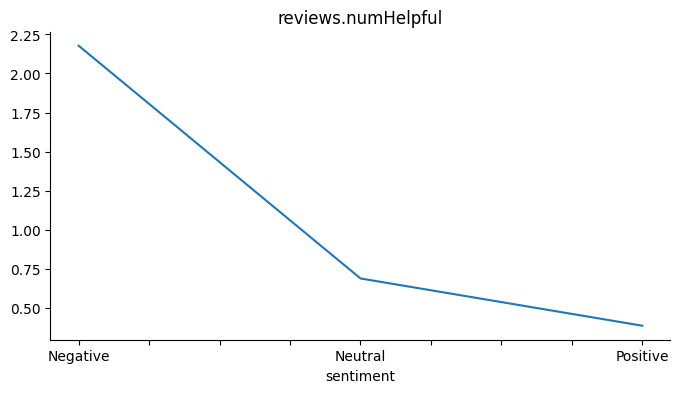

In [ ]:
from matplotlib import pyplot as plt
_df_1['reviews.numHelpful'].plot(kind='line', figsize=(8, 4), title='reviews.numHelpful')
plt.gca().spines[['top', 'right']].set_visible(False)

From the table and diagram, we can see that the mean number of reviews helpful is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in helpful numbers.
Now, we will check how it is distributed through violin plot

In [ ]:
# Creating dataframe and removing 0 helpful records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'reviews.numHelpful'])
senti_help = senti_help[senti_help['reviews.numHelpful'] != 0.00]

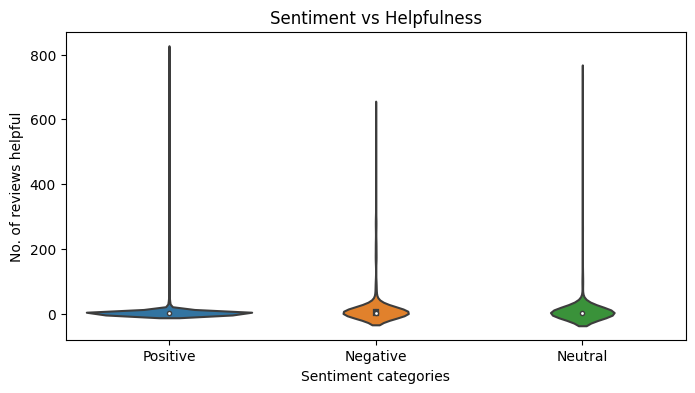

In [ ]:
from matplotlib import rcParams

#plot layout
plt.rcParams.update({'font.size': 10})
rcParams['figure.figsize'] = (8,4)

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["reviews.numHelpful"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('No. of reviews helpful')
plt.show()

### Insights:
From the plot, positive reviews category's violin is wider, it suggests more variability in the ratings for that category.
While positive category's violin is little taller than the other category, indicating a higher frequency of helpful reviews around a certain value.
So, we can declare that more number of positive reviews are having high helpful reviews.

## Year vs Sentiment count
We will see how many reviews were posted based on sentiments in each year from 2009 to 2019

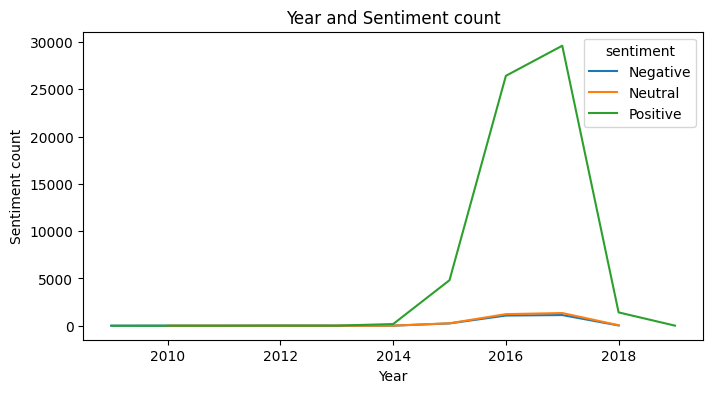

In [ ]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

### Insights:
From the plot we can clearly see the rise in positive reviews from 2014. Reaching its peak around 2017 and there is a dip in 2018. All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews.

## Day of month vs Reviews count
Let's check if there are any relationship between reviews and day of month

In [ ]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

day  reviews
0     1     1688
1     2     1786
2     3     2436
3     4     2218
4     5     1774
5     6     2914
6     7     2506
7     8     2066
8     9     1909
9    10     1619
10   11     1535
11   12     1633
12   13     1650
13   14     2010
14   15     2434
15   16     3668
16   17     3104
17   18     3313
18   19     2279
19   20     1824
20   21     2055
21   22     1814
22   23     3790
23   24     2195
24   25     2160
25   26     1829
26   27     1759
27   28     2246
28   29     1660
29   30     2624
30   31     1399

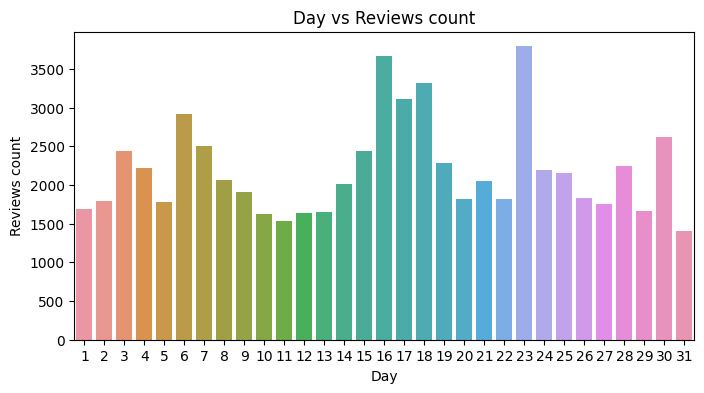

In [ ]:
#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

### Insights:
The review counts are more or less symmetrically distributed with more reviews between middle dates like 6, 7, 15, 17, and 23. There is a huge drop both at the start and end of the month.

## Creating few more features for text analysis
*Polarity:* We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity.

*Review length:* length of the review which includes each letters and spaces.

*Word length:* This measures how many words are there in review.

In [ ]:
from textblob import TextBlob

process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
process_reviews.head()

id       asins   brand  \
0  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
1  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
2  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
3  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   
4  AVqkIhwDv8e3D1O-lebb  B01AHB9CN2  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date  \
0 2017-01-13 00:00:00+00:00   
1 2017-01-13 00:00:00+00:00   
2 2017-01-13 00:00:00+00:00   
3 2017-01-13 00:00:00+00:00   
4 2017-01-12 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 True   

   reviews.numHelpful  ...                                 reviews.sourceURLs  \
0                 0.0  ...  http://reviews.bestbuy.com/3545/5620406/review...   
1                 0.0  ...  http://reviews.bestbuy.com/3545/5620406/review...   
2                 0.0  ...  http://reviews.bestbuy.com/3545/5620406/review...   
3                 0.0  ...  http://reviews.bestbuy.com/3545/5620406/review...   
4                 0.0  ...  http://reviews.bestbuy.com/3545/5620406/review...   

  reviews.username                                            reviews  \
0          Adapter  disappointed children love ability monitor con...   
1           truman  great beginner experienced person bought gift ...   
2            DaveZ  inexpensive tablet learn step nabi thrilled le...   
3           Shacks  ive fire hd weeks love tablet great valuewe pr...   
4        explore42  bought grand daughter visit set user entered a...   

  sentiment day  month  year  polarity  review_len  word_count  
0  Positive  13      1  2017 -0.125000          69           8  
1  Positive  13      1  2017  0.600000          63           9  
2  Positive  13      1  2017  0.600000          87          12  
3  Positive  13      1  2017  0.377381         310          48  
4  Positive  12      1  2017  0.250000         274          38  

[5 rows x 21 columns]

In [ ]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Sentiment polarity distribution

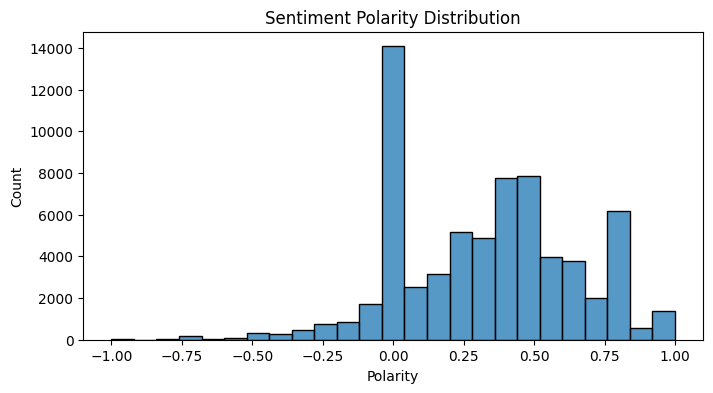

In [ ]:
# Create a histogram using histplot
sns.histplot(process_reviews['polarity'], bins=25, kde=False)

# Add labels and title
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')

# Show the plot
plt.show()

### Insights:
* We have a lot of positive polarities compared to the negative polarities.
* This polarity distributions assures the number of positive reviews we had.
* We can say that this polarity is assymetrically distributed.




## Review Text Length Distribution

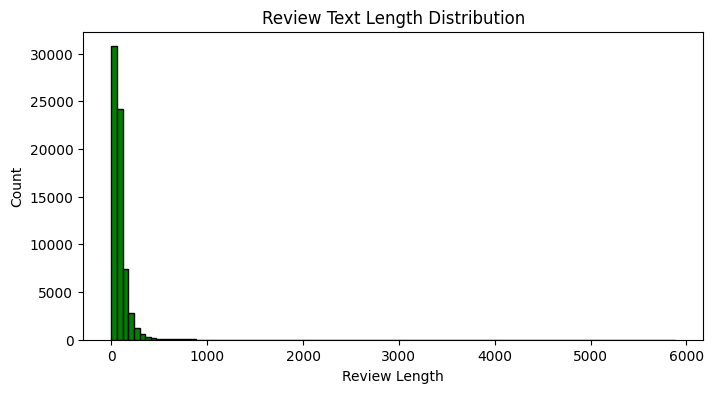

In [ ]:
# Create a histogram
plt.hist(process_reviews['review_len'], bins=100, color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Review Text Length Distribution')

# Show the plot
plt.show()

We have a right skewed distribution where most of the lengths falls between 0-1000.

## Monogram analysis
We will be using ngrams to analyse the text, based on it's sentiment.

In [ ]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

In [ ]:
# custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
# custom function for horizontal bar chart
import plotly.graph_objs as go

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
# Get the bar chart from positive reviews
from collections import defaultdict

freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

In [ ]:
# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

In [ ]:
# Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

In [ ]:
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Create a figure and three subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                                    "Frequent words of negative reviews"])

# Add the trace to the subplot at rows and columns
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

# Adjust layout
fig.update_layout(title='Word Count Plots', height=200, width=100)

# Save the plot as an HTML file (optional)
pyo.plot(fig, filename='word_count_plots.html', auto_open=False)

# Display the plot
pyo.iplot(fig)

**Note that**, as the plot is huge, it is not being able to be displaced. So the image is being saved in a html file with name 'word_count_plots' and attached along with the code file.

## Wordcloud-Positive reviews

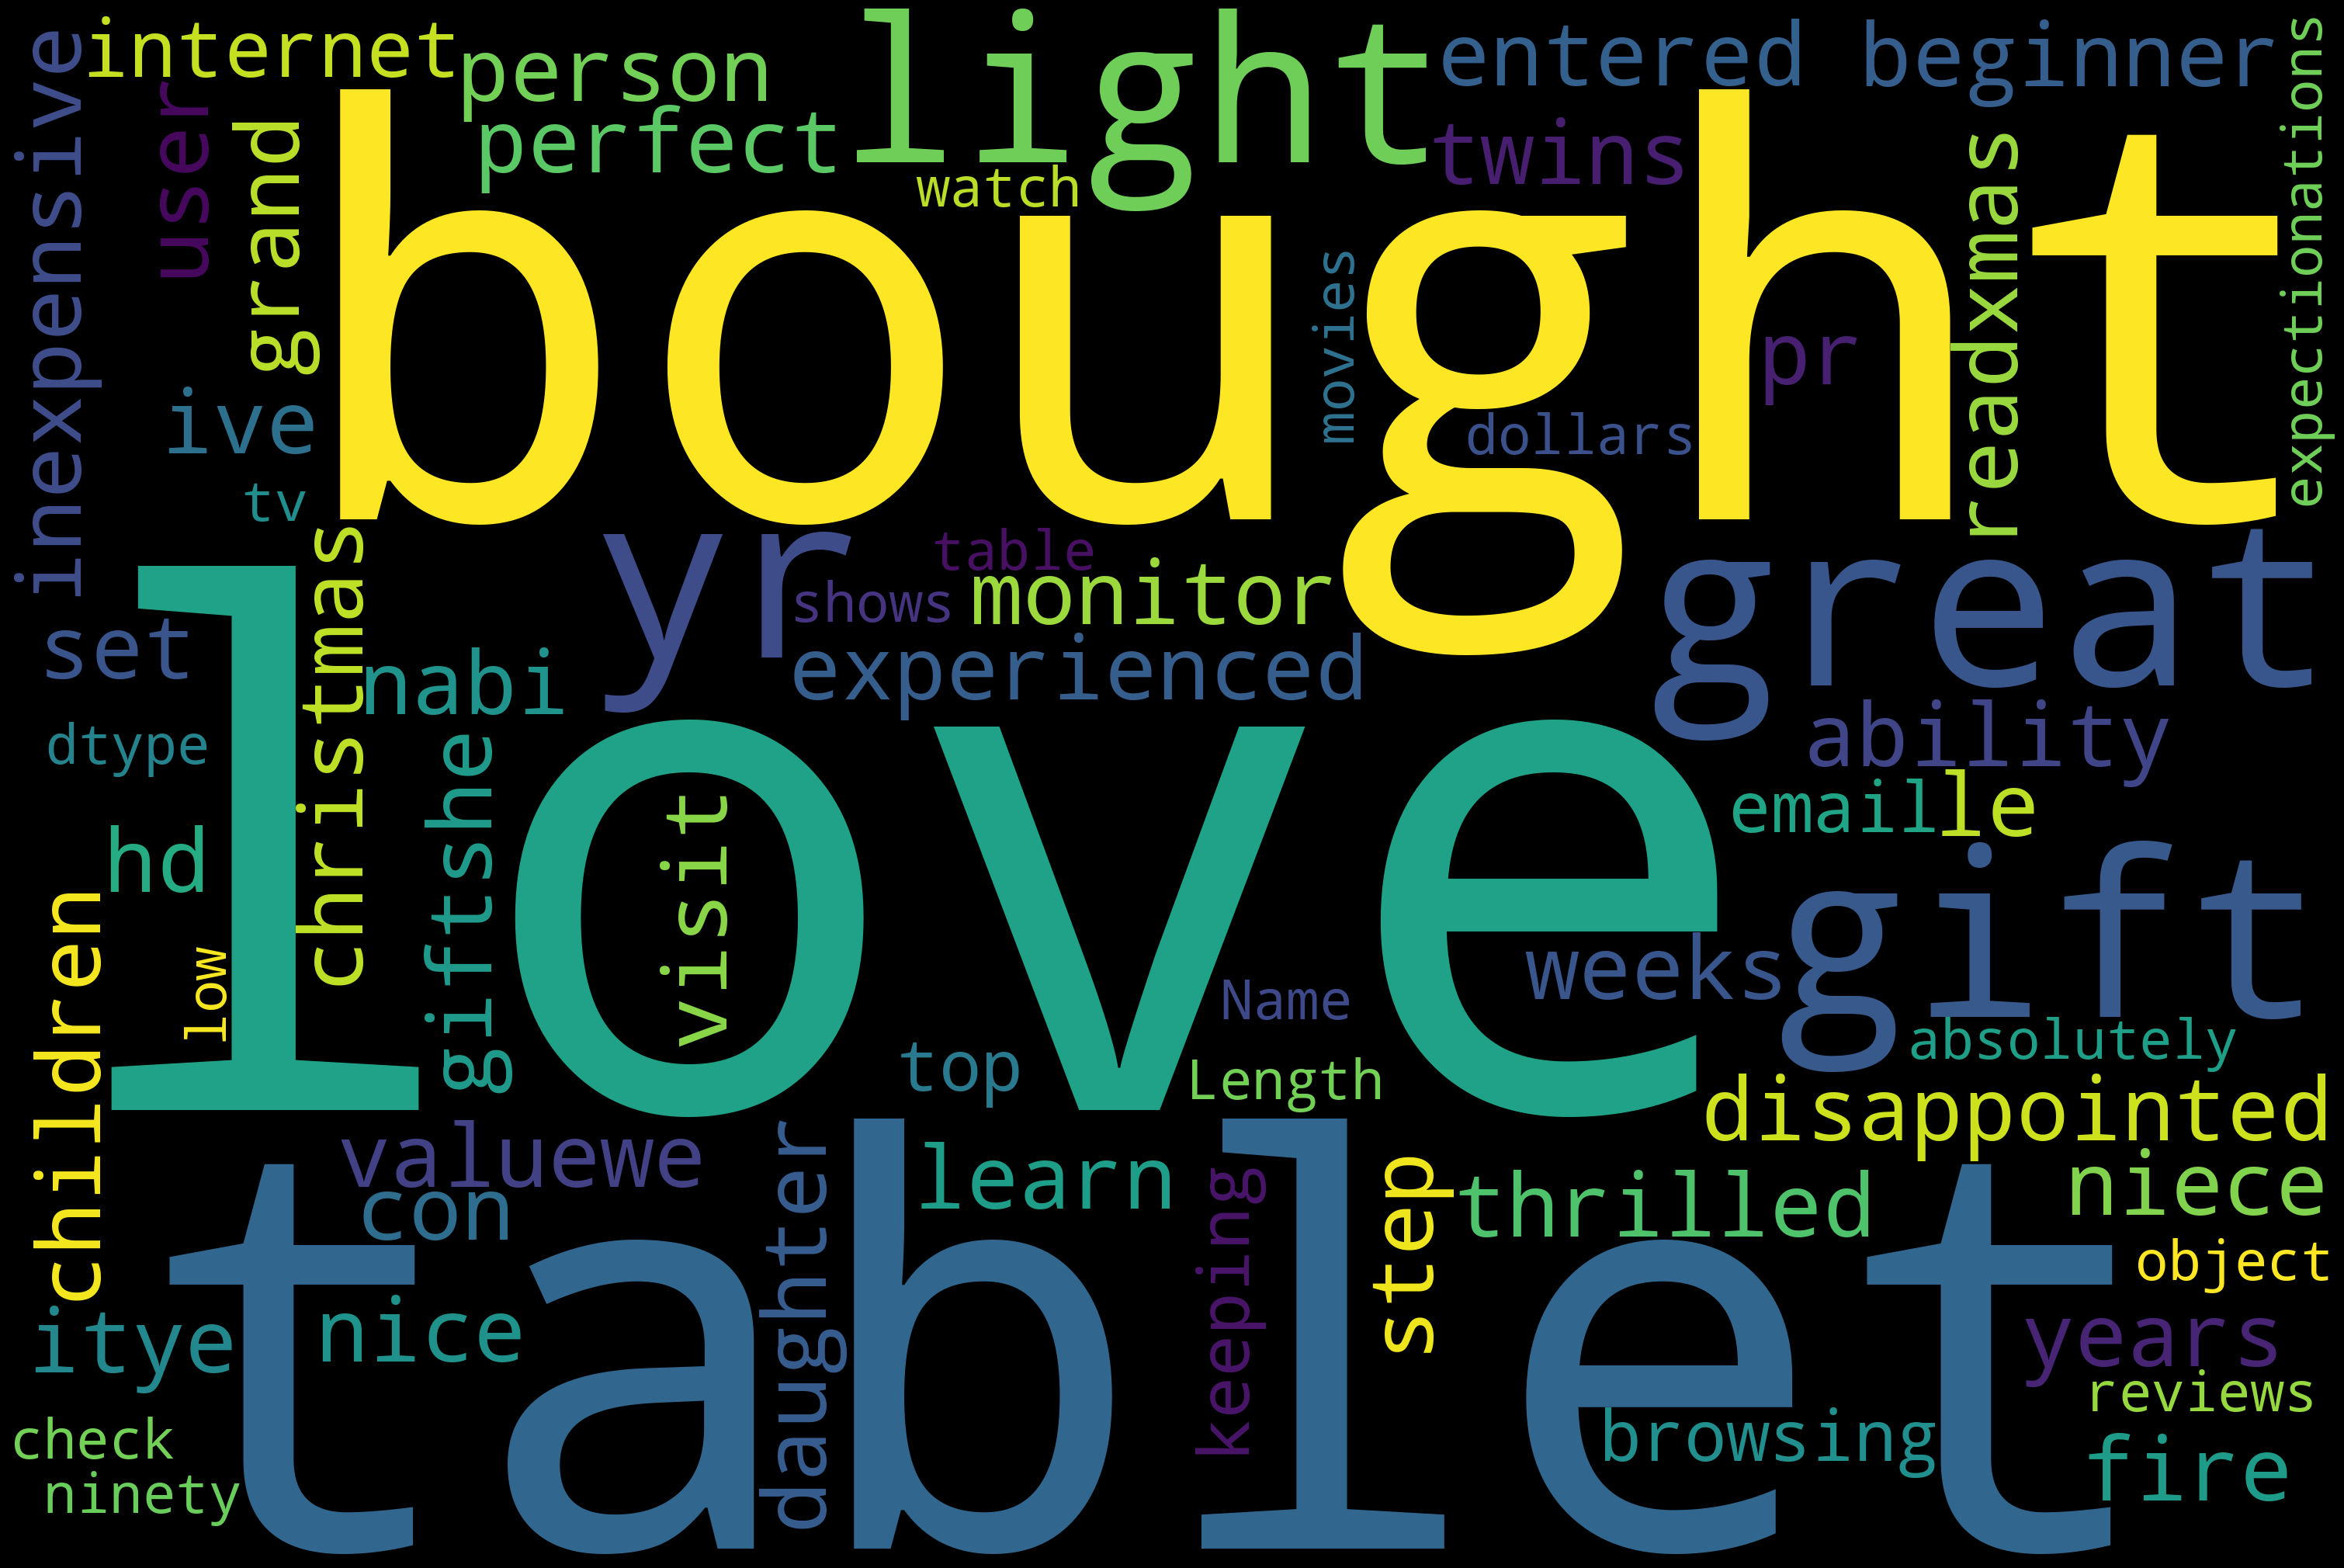

In [ ]:
text = review_pos["reviews"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see positive words like love,great,bought etc.,

## Wordcloud-Neutral reviews

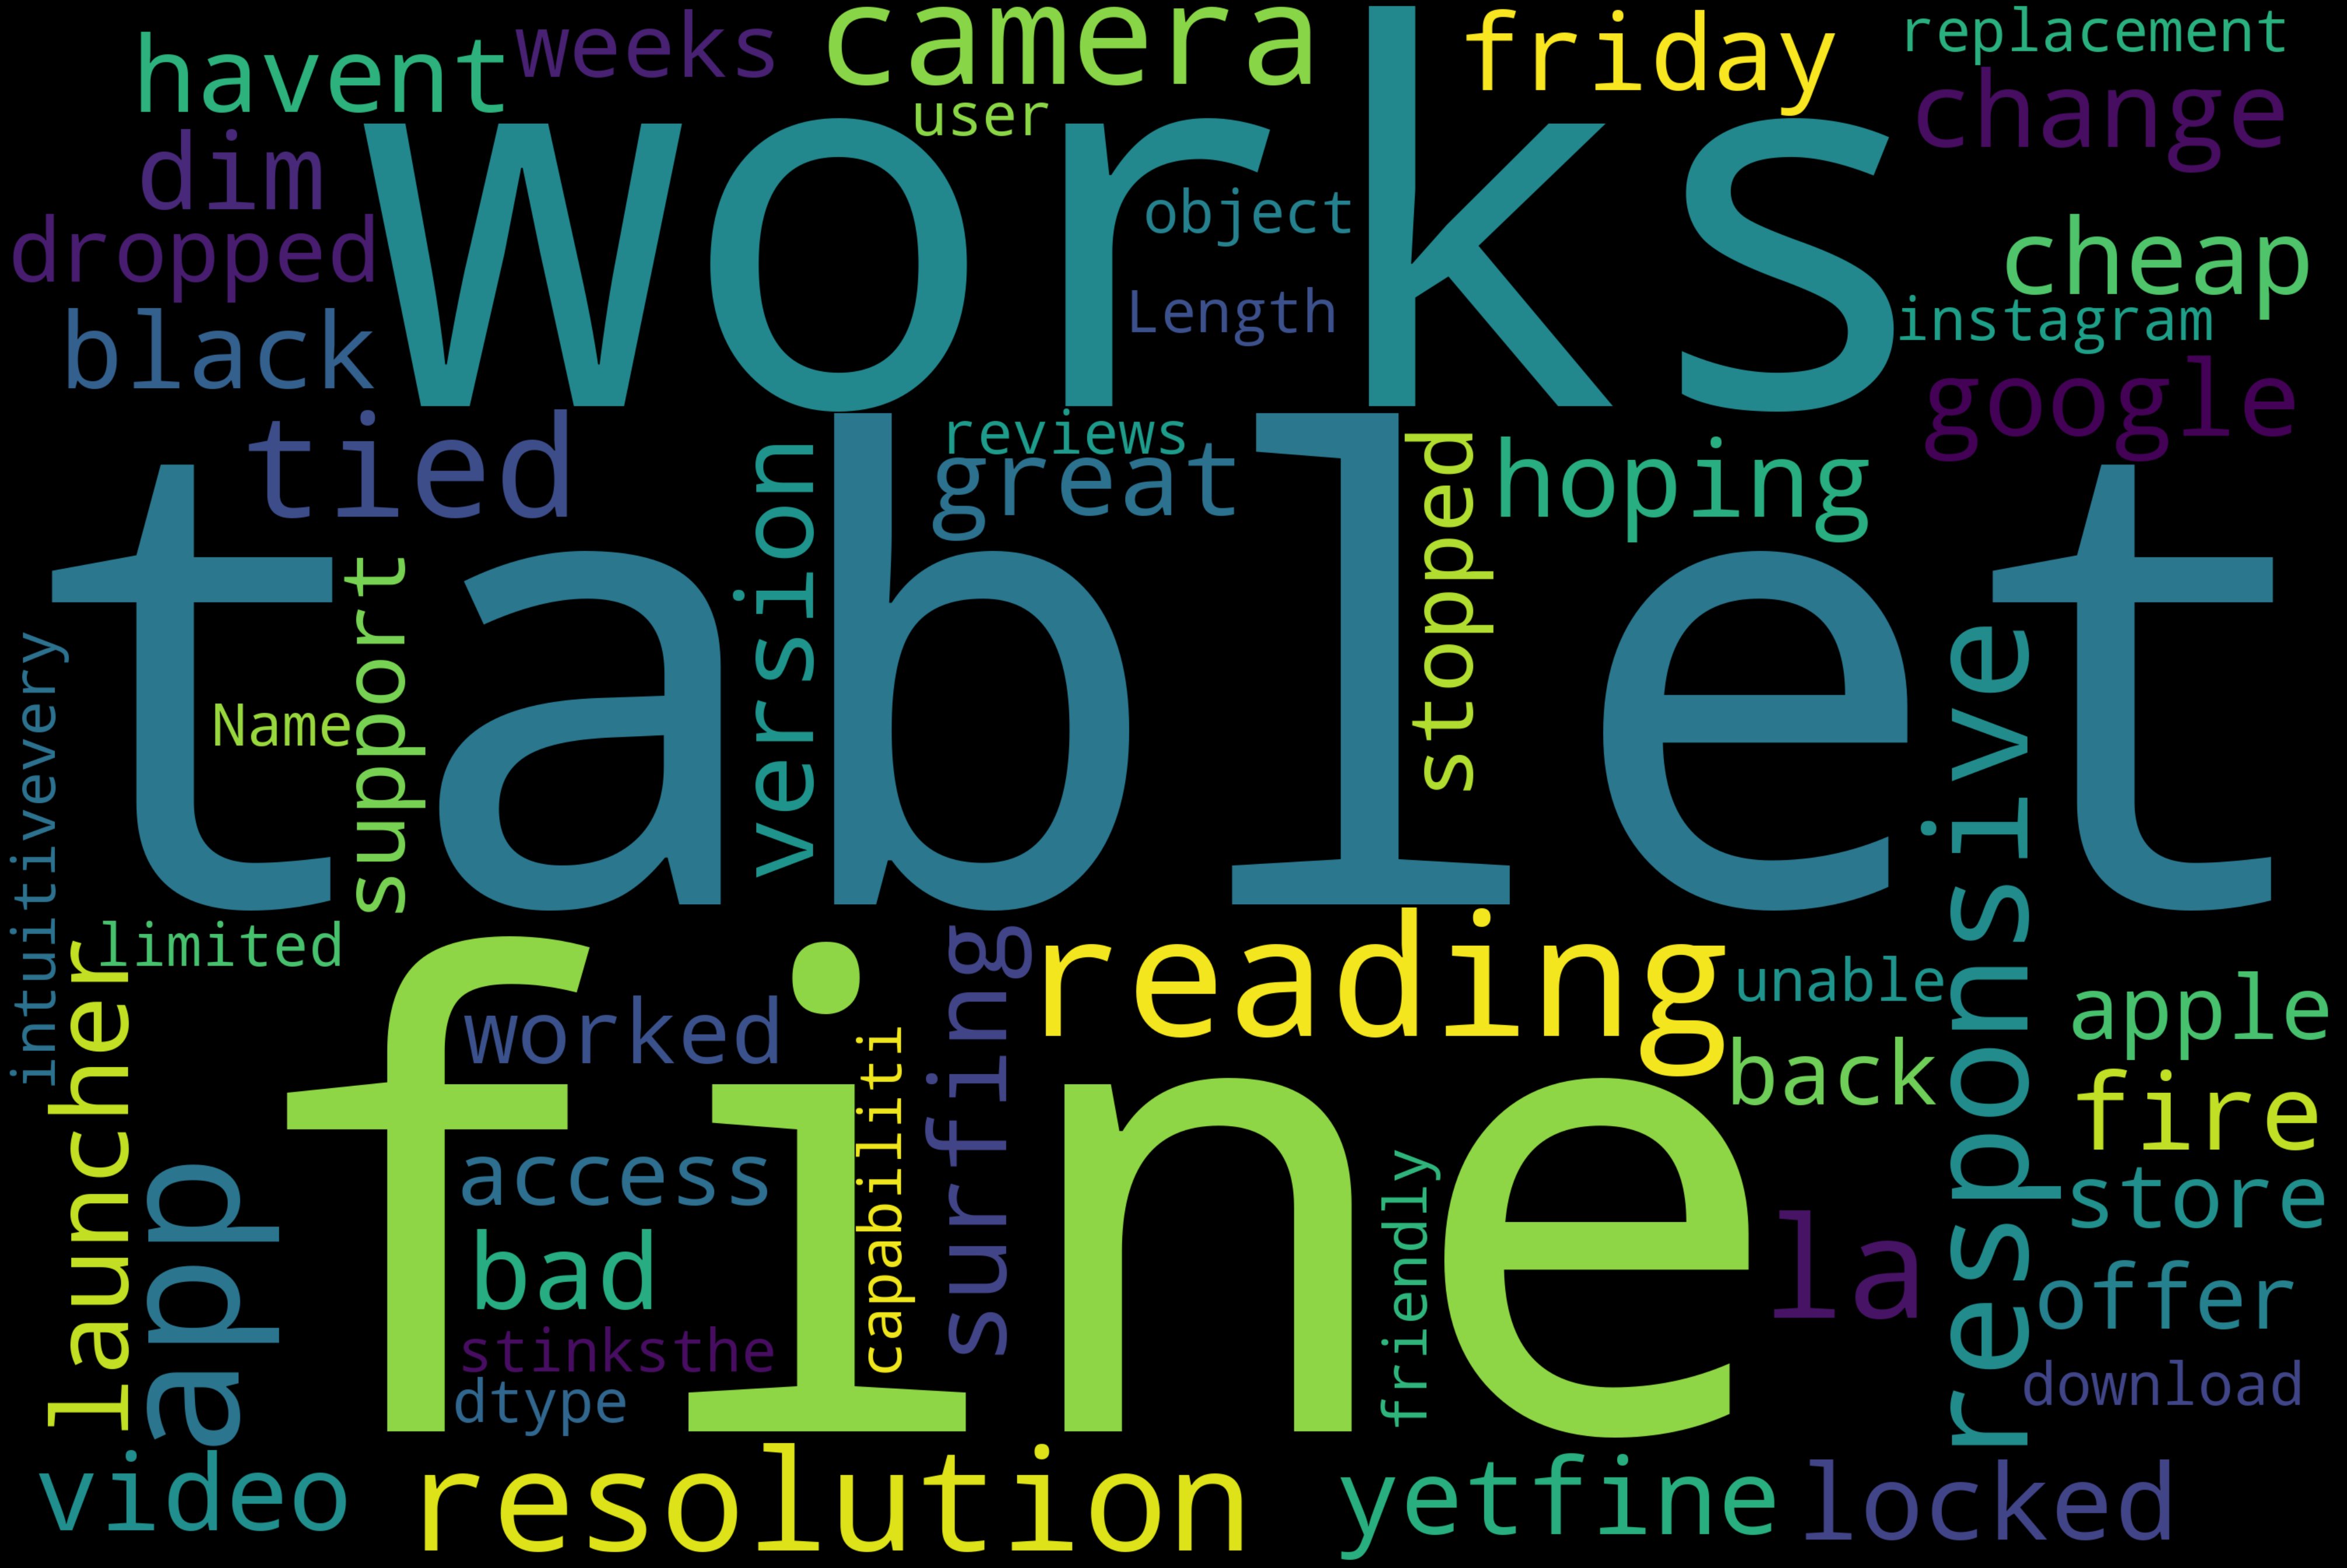

In [ ]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the neutral review words are focussed on the products and how can they be improved.

## Wordcloud-Negative reviews

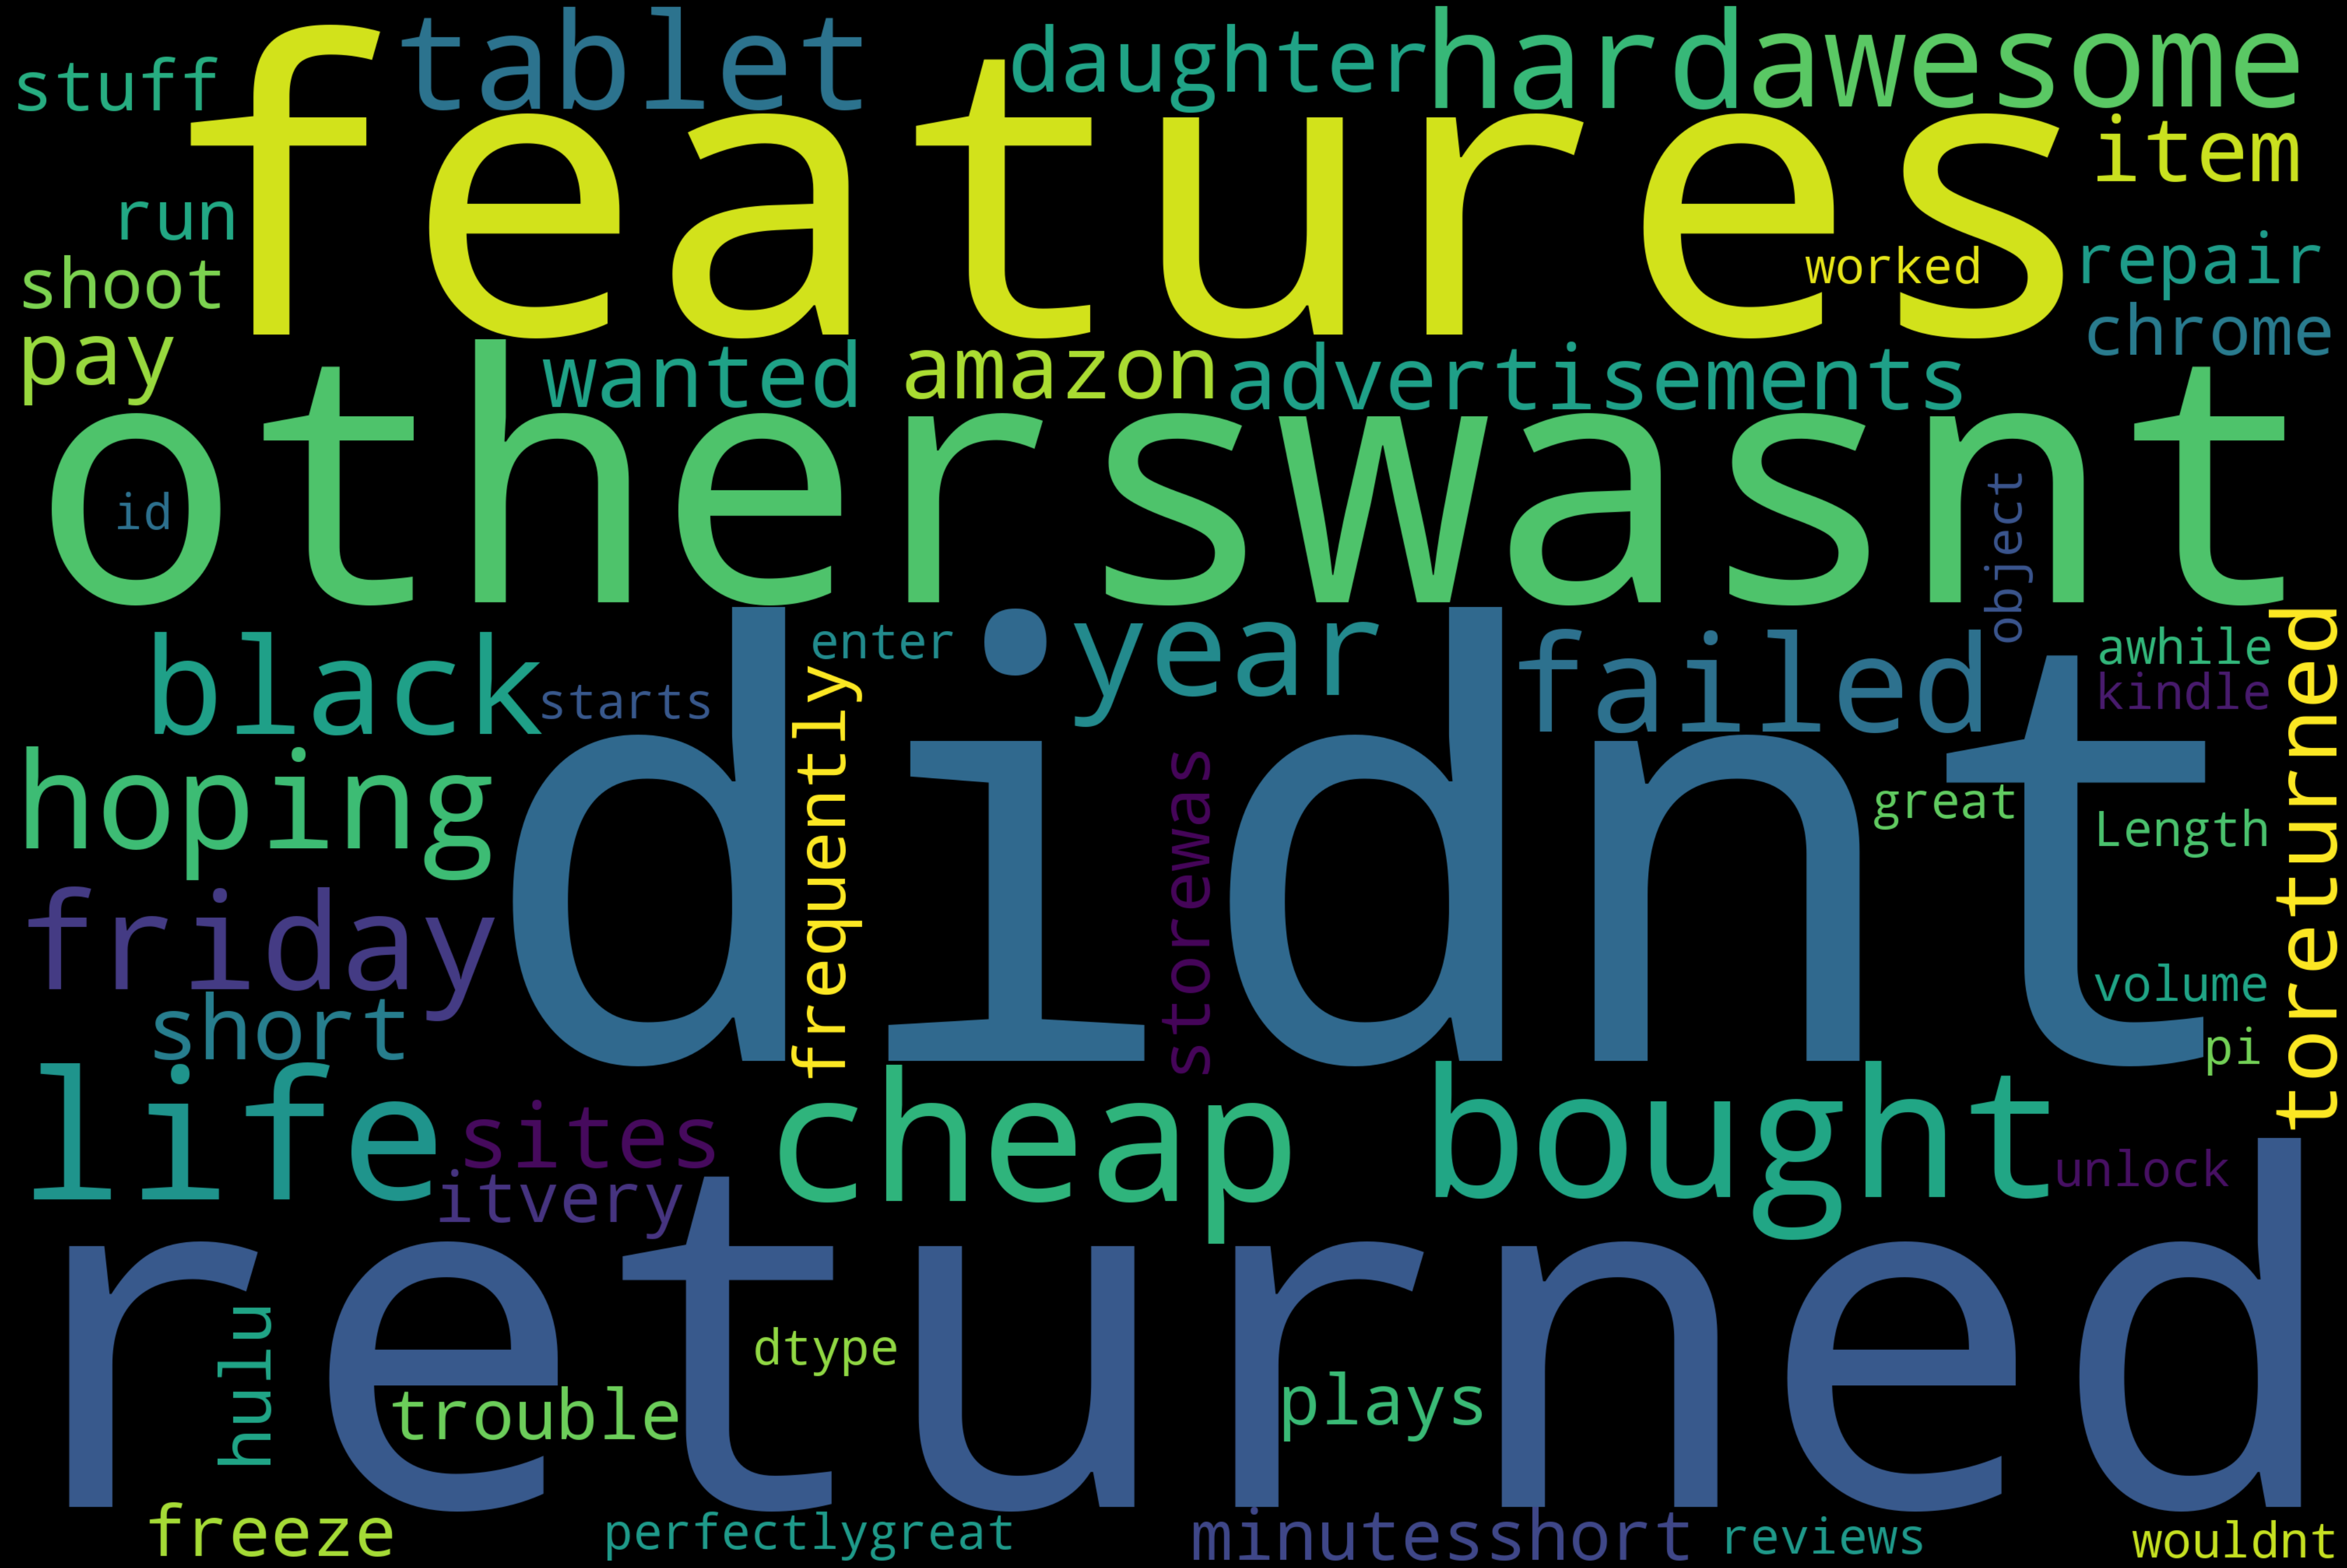

In [ ]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see negative review words such as returned,cheap,didnt, failed, wasnt etc.,

# **Extracting Features**
## Encoding target variable-sentiment
Encoding our target variable with Label encoder.

In [ ]:
# calling the label encoder function
import sklearn
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment'])

In [ ]:
process_reviews['sentiment'].unique()

array([2, 0, 1])

In [ ]:
process_reviews['sentiment'].value_counts()

2    62494
1     2898
0     2505
Name: sentiment, dtype: int64

## Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word.

In [ ]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  disappointed children love ability monitor con...
1  great beginner experienced person bought gift ...
2  inexpensive tablet learn step nabi thrilled le...
3  ive fire hd weeks love tablet great valuewe pr...
4  bought grand daughter visit set user entered a...

In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'ive fire hd week love tablet great valuew prime member tablet shine love easili access prime content movi download watch laterthi nice nice crisp bright infact brighter ipad pro cost base model build fire insan awesom run thick smooth glossi feel back amaz hold futurist tab ur handsgood'

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF.

## TFIDF(Term Frequency — Inverse Document Frequency)
In this technique, the word is quantified in documents. We generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [ ]:
X.shape

(67897, 5000)

In [ ]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

## Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here we use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 62494, 1: 2898, 0: 2505})
Resampled dataset shape Counter({2: 62494, 0: 62494, 1: 62494})


## Train-test split
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [ ]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# **Model Building**
## Sentiment Analysis

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection
First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

In [ ]:
from sklearn.model_selection import cross_val_score

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9279646035744818
Decision Tree Test Accuracy: 0.9254178172218728
KNN Test Accuracy: 0.9005717513668369
Naive Bayes Test Accuracy: 0.8925583163095634


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 92%. Now, we will go with logistic regression with hyperparameter tuning.

## Logistic Regression with Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lr_cv = LogisticRegression(random_state=42)
params = {
    'C': [0.001,0.01,0.1,1,10],
    'penalty': ['l1','l2','elasticnet',None],
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],}
clf = RandomizedSearchCV(lr_cv, params,cv=5, verbose=0,n_jobs=-1,return_train_score=True)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=10, penalty=None, random_state=42, solver='newton-cg')
The mean accuracy of the model is: 0.8240276503594973


In [ ]:
logreg = LogisticRegression(C=10, penalty=None, random_state=42,solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


## Classification metrics

Confusion matrix, without normalization


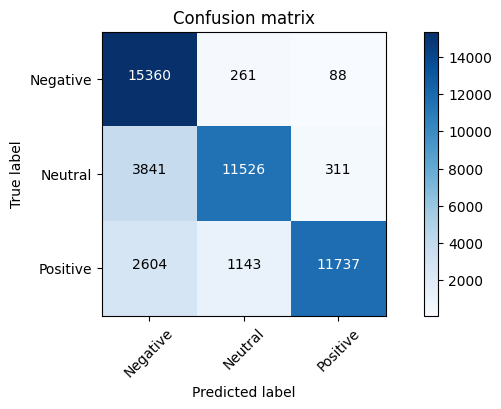

In [ ]:
from sklearn import metrics

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

Check out the diagonal elements(15360+11526+11737), they are correctly predicted records and rest are incorrectly classified by the algorithm

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82     15709
           1       0.89      0.74      0.81     15678
           2       0.97      0.76      0.85     15484

    accuracy                           0.82     46871
   macro avg       0.85      0.82      0.82     46871
weighted avg       0.85      0.82      0.82     46871



Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

## ROC-AUC curve
This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.

In [ ]:
#Binarizing the target feature
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
#OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
#Computing TPR and FPR
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [ ]:
# interpolate all ROC curves at this points
from scipy import interp

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [ ]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

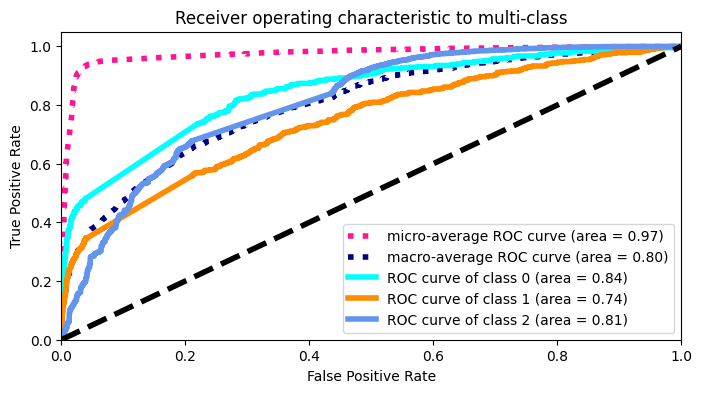

In [ ]:
# Plot all ROC curves
from itertools import cycle

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Insights:

* Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR
* Coming to micro and macro average, micro average preforms really well and macro average shows a good score
* 'A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if we suspect there might be class imbalance'.



# **Conclusion**
We have done a neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights.

* Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis
* Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products
* Most of the reviews in this dataset were about string instruments such as guitar.
* Balancing the dataset got me a very fruitful accuracy score. So balancing the target feature is important
* In sentiment analysis, we should concentrate on our f1 score where we got an average of 80%.
